# Loan Application Status Prediction

**Problem Statement:**

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

**Independent Variables:**

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

**Dependent Variable (Target Variable):**

- Loan_Status

 

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#for model building

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#for spliting dataset in train and test
from sklearn.model_selection import train_test_split

#for model evalution
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')



# Importing dataset

In [2]:
loan=pd.read_csv(r'D:\DT EVAL Projects\loan.csv')

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

There are 614 rows and 13 columns including target column

In [5]:
#checking information of dataset

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#checking datatype of dataset

loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
loan.drop('Loan_ID',axis=1,inplace=True)

# Checking null values

In [9]:
loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are Null Values in few columns of our dataset.
To fill Null Values of Nominal data such as Gender, Married, Dependents, Self_Employed & Credit_History 
lets use 'most frequent' strategy and to fill null values of continuous data such as LoanAmount & Loan_Amount_Term we will use mean strategy.

# Replacing Null values

In [10]:
#Replacing missing vales in categorical columns

loan['Gender']=loan['Gender'].fillna(loan['Gender'].mode()[0])
loan['Married']=loan['Married'].fillna(loan['Married'].mode()[0])
loan['Dependents']=loan['Dependents'].fillna(loan['Dependents'].mode()[0])
loan['Self_Employed']=loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0])

From the above information,categorical columns of the dataset are treated. 
Now we will treat the columns having continuous values.

In [11]:
#Replacing missing vales in numerical columns

loan['LoanAmount']=loan['LoanAmount'].fillna(loan['LoanAmount'].mean())
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mean())
loan['Credit_History']=loan['Credit_History'].fillna(loan['Credit_History'].mean())


In [12]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have treated all the Null Values found in our data set. 
Let us check again the number of null values present in our data to verify

In [13]:
loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

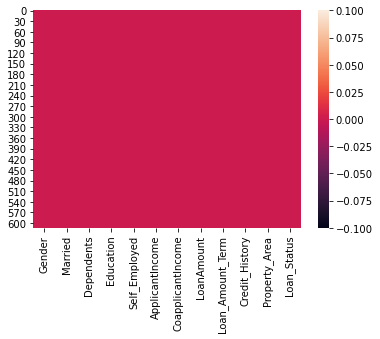

In [14]:
sns.heatmap(loan.isnull())

We can see that all the Null Values have been treated in out dataset

# Uni Variate Analysis

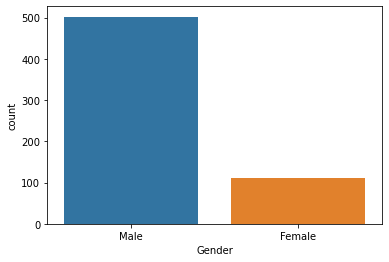

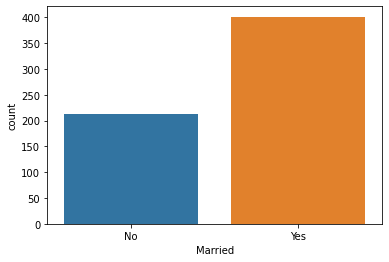

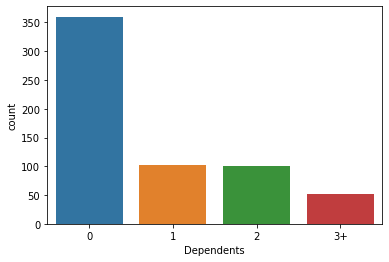

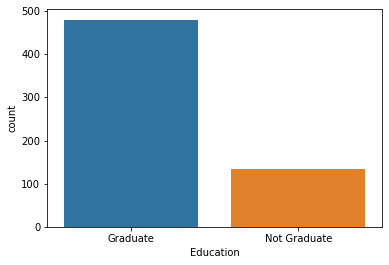

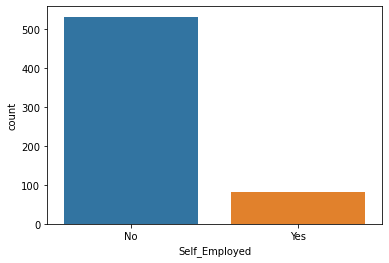

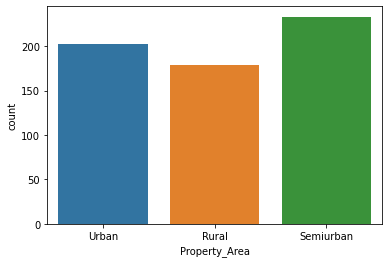

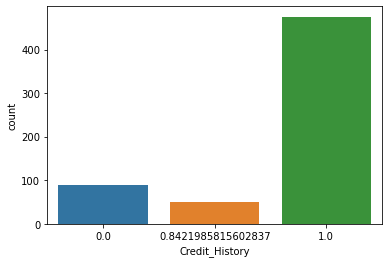

In [15]:
columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History']

for i,col in enumerate(columns):
    plt.figure(i)
    sns.countplot(x=col,data=loan)

Gender: There are around 500 male applicants and only 110 female applicants applied for Loan.

Married: There are around 500 male applicants and only 112 female applicants applied for Loan.

Dependents: This column tells us about how many dependents do the loan applicants have. Majority of the people do not have any dependent i.e. 360, 101 have 1 dependent, 100 have 2 dependents, 50 of the more than 3 dependents.

Education: Maximum people from the loan application file are Graduated i.e. 480 of them, but 120 are not Graduated.

Self_Employed: Hardly few people are Self Employed i.e. 80 people, 520 are not Self Employed and are working under some Organization.

Property_Area: Maximum(220) people have a Property Area in a SemiUrban Place. 200 of them own it in Urban Area and 175 own in the Rural Area.

Credit_History: 520 people have a Credit History and only 85 of them don't. Majority have a Credit History

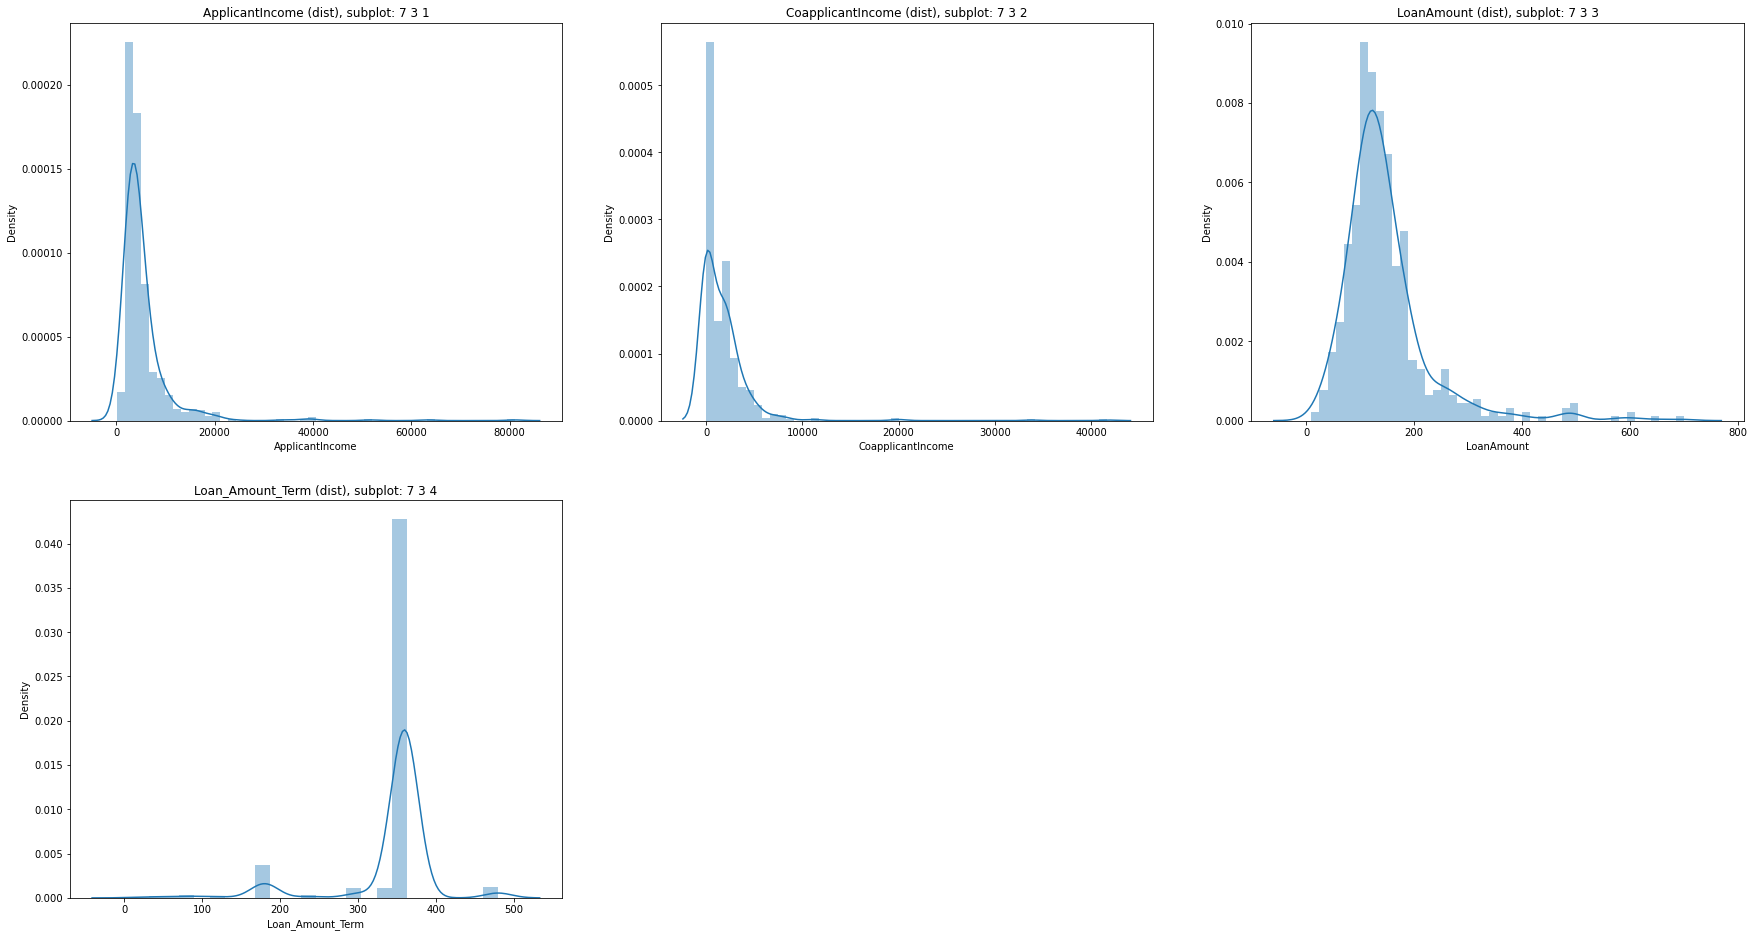

In [16]:
#numerical attributes visualisation

col1=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

#plot numerical data

a=7 # no of rows
b=3 # no of columns
c=1 #initilize the plot counter

fig=plt.figure(figsize=(30,60))

for i in col1:
    plt.subplot(a,b,c)
    plt.title('{} (dist), subplot: {} {} {}'.format(i,a,b,c))
    plt.xlabel(i)
    sns.distplot(loan[i])
    c=c+1
    
plt.show()

**ApplicantIncome:** Majority of the people have their income below 20000. Hardly few people earn more than 20000.

**CoapplicantIncome:** Majority of the income of the Co Applicants is below 10000 and hardly few of the Co Applicants have it above 10000.

**LoanAmount:** The Loan Amount given to the people lies between the range 0 and 700. The Loan Amount of Maximum people is between 0 to 200

# Bi Variate Analysis

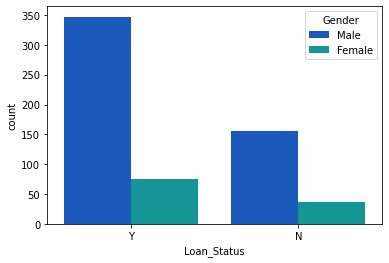

In [17]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Gender',data=loan)
plt.show()

In both cases male have higher chance to get the loan and loan got rejected

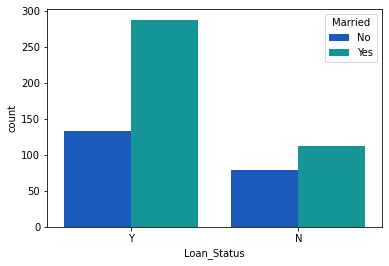

In [18]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Married',data=loan)
plt.show()

In both cases married have higher chance to get the loan and loan got rejected

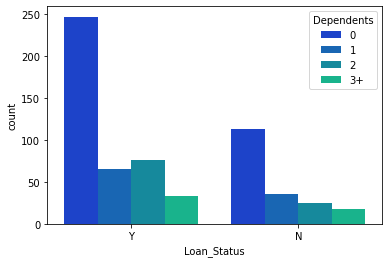

In [19]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Dependents',data=loan)
plt.show()

The applicant who have 0 dependents have higher chance to get and loan got rejected

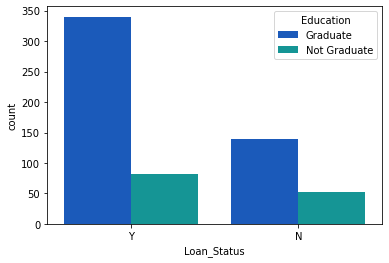

In [20]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Education',data=loan)
plt.show()

Most of the Graduated one get loan and also loan got rejected

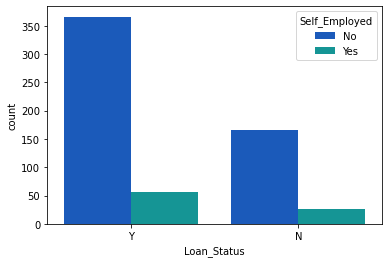

In [21]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Self_Employed',data=loan)
plt.show()

Self employed will get loan status approved and also most of them got rejected

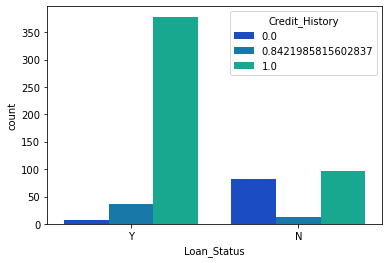

In [22]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Credit_History',data=loan)
plt.show()

The applicant having 1 credit history get loan easily

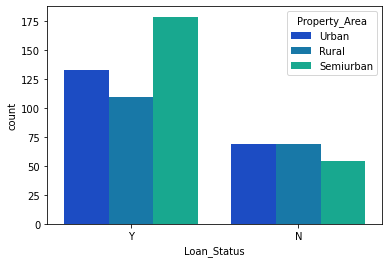

In [23]:
sns.countplot(loan['Loan_Status'],palette='winter',hue='Property_Area',data=loan)
plt.show()

The property in Semiurban will get will loan easily

# Label Encoding

In [24]:
#label Encoding object variables

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
loan['Loan_Status']=label.fit_transform(loan.Loan_Status)

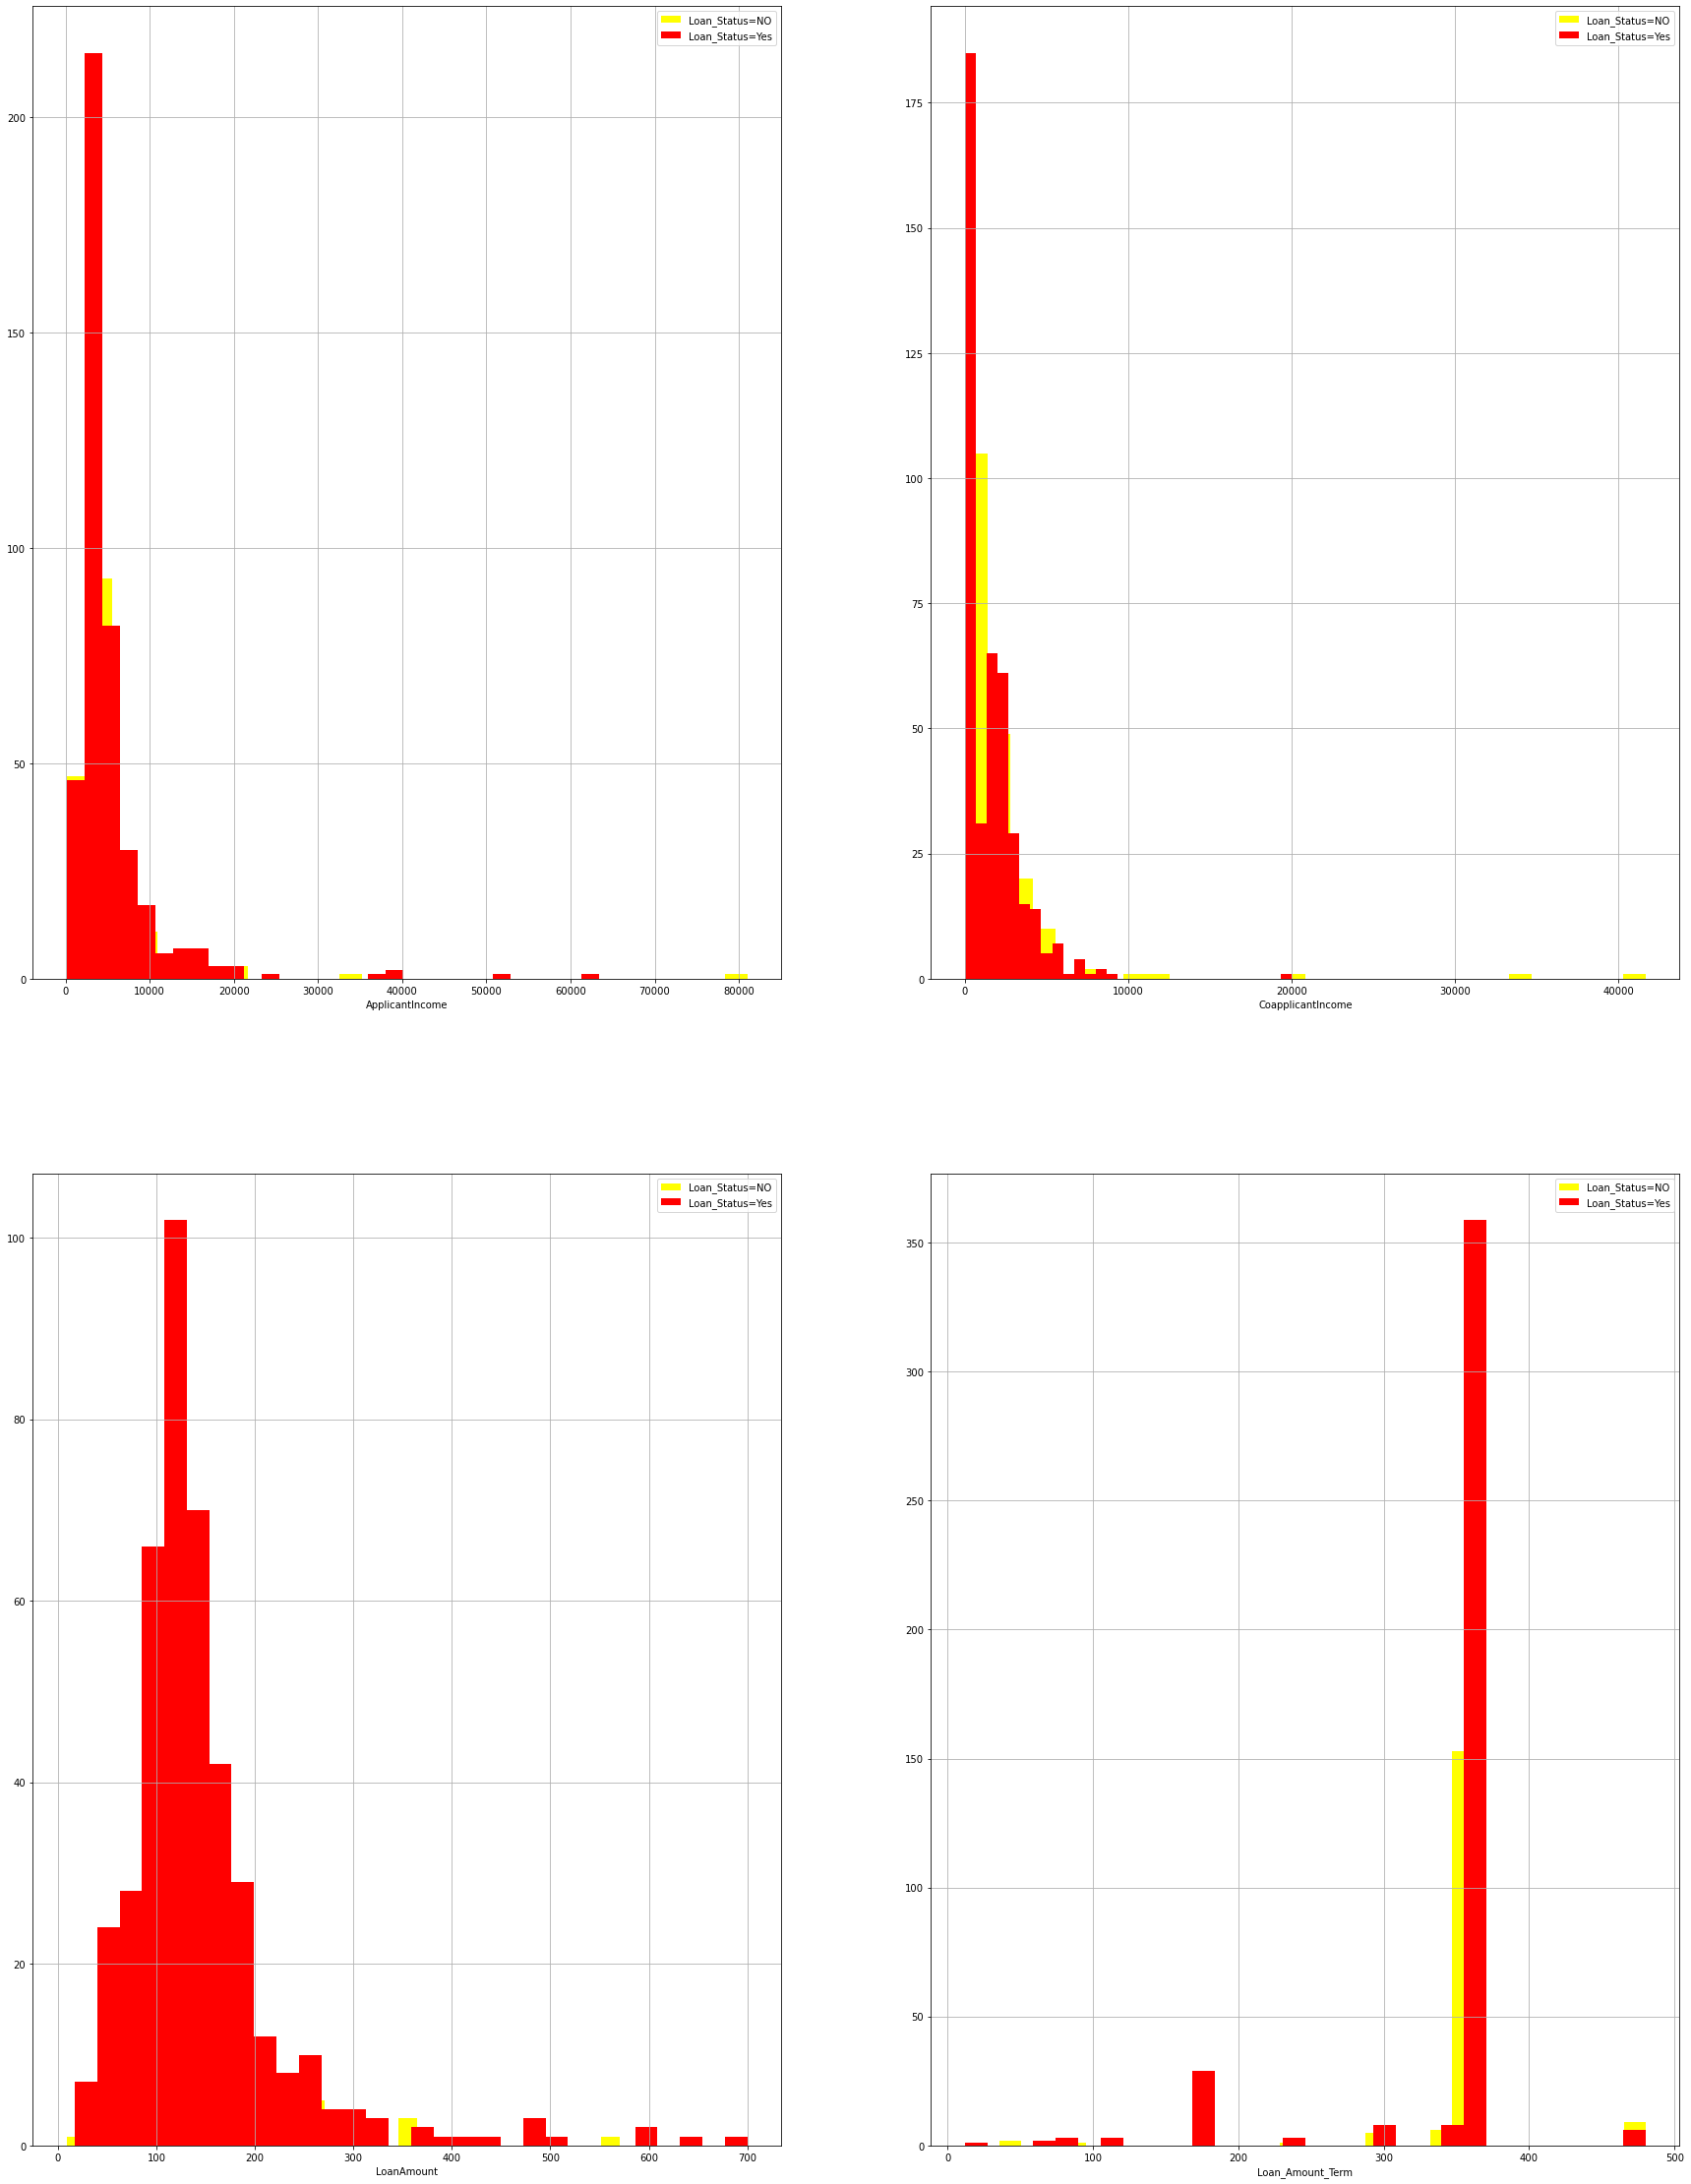

In [25]:
plt.figure(figsize=(30,40))
count_columns=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for i, column in enumerate(count_columns,1):
    plt.subplot(2,2,i)
    loan[loan["Loan_Status"]==0][column].hist(bins=30,color='yellow',label='Loan_Status=NO',alpha=1)
    loan[loan["Loan_Status"]==1][column].hist(bins=30,color='red',label='Loan_Status=Yes',alpha=1)
    plt.legend()
    plt.xlabel(column)

**ApplicantIncome:** Applicant income around 3000-4000 get loan.

**CoapplicantIncome:** Coapplocant income around 1000 get loan.

**LoanAmount:** Loan amount around 120 can have higher chances to get loan.

**Loan_Amount_Term:** Most of the loan applicants get load if their loan tenure is 360.

**Label Encoding the categorial columns**

In [26]:
loan.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int32
dtype: object

In [27]:
#label encoding the objects variables

from sklearn.preprocessing import LabelEncoder
cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
label=LabelEncoder()
loan[cols]=loan[cols].apply(LabelEncoder().fit_transform)

#print head

loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


Now the categorical object columns had been changed to numerical values

# Multi Variate Analysis

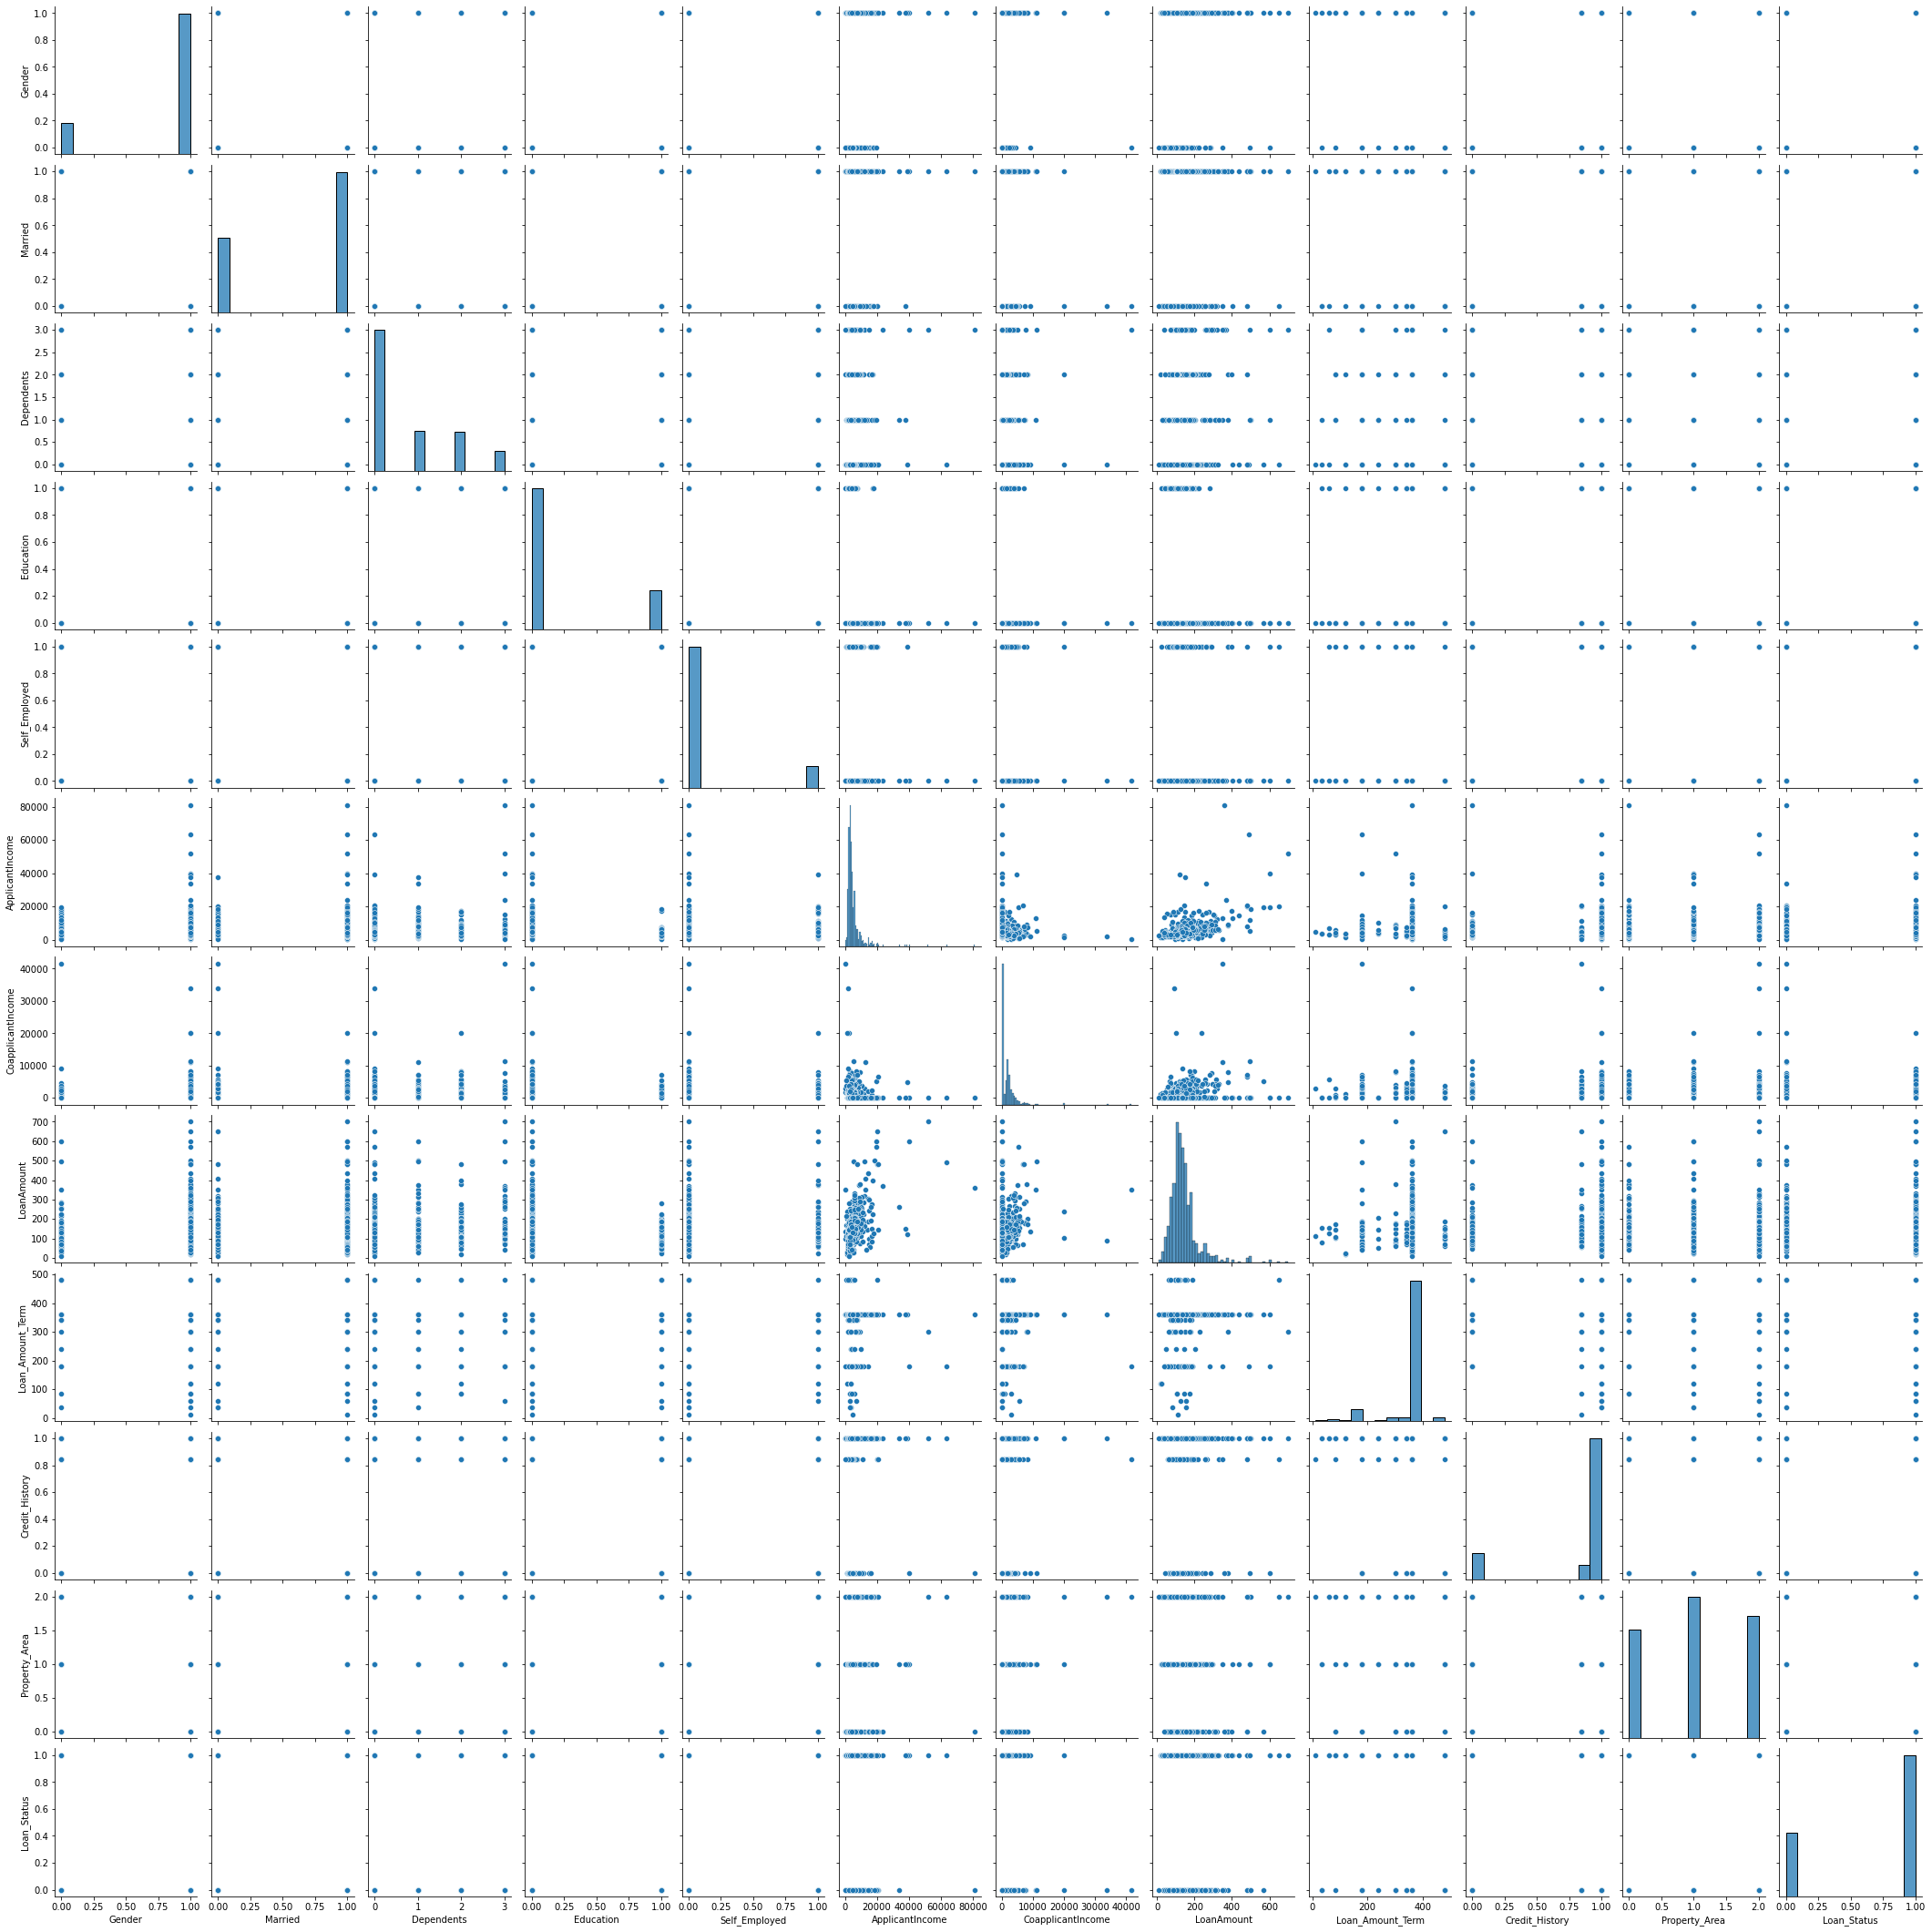

In [28]:
sns.pairplot(loan)
plt.show()

In [29]:
#statistical summary

loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observation:

We can observe that the standard deviation of initial columns are not huge but the values of columns like ApplicantIncome,CoApplicantIncome and so on is widely Deviated which also shows the possibility of Skewness in Data.

Looking at the min & max values of our dataset, we can also see the possibility of having outliers in our data.

# Checking correlation

In [30]:
#lets check correlation

loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,-0.037392,-0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


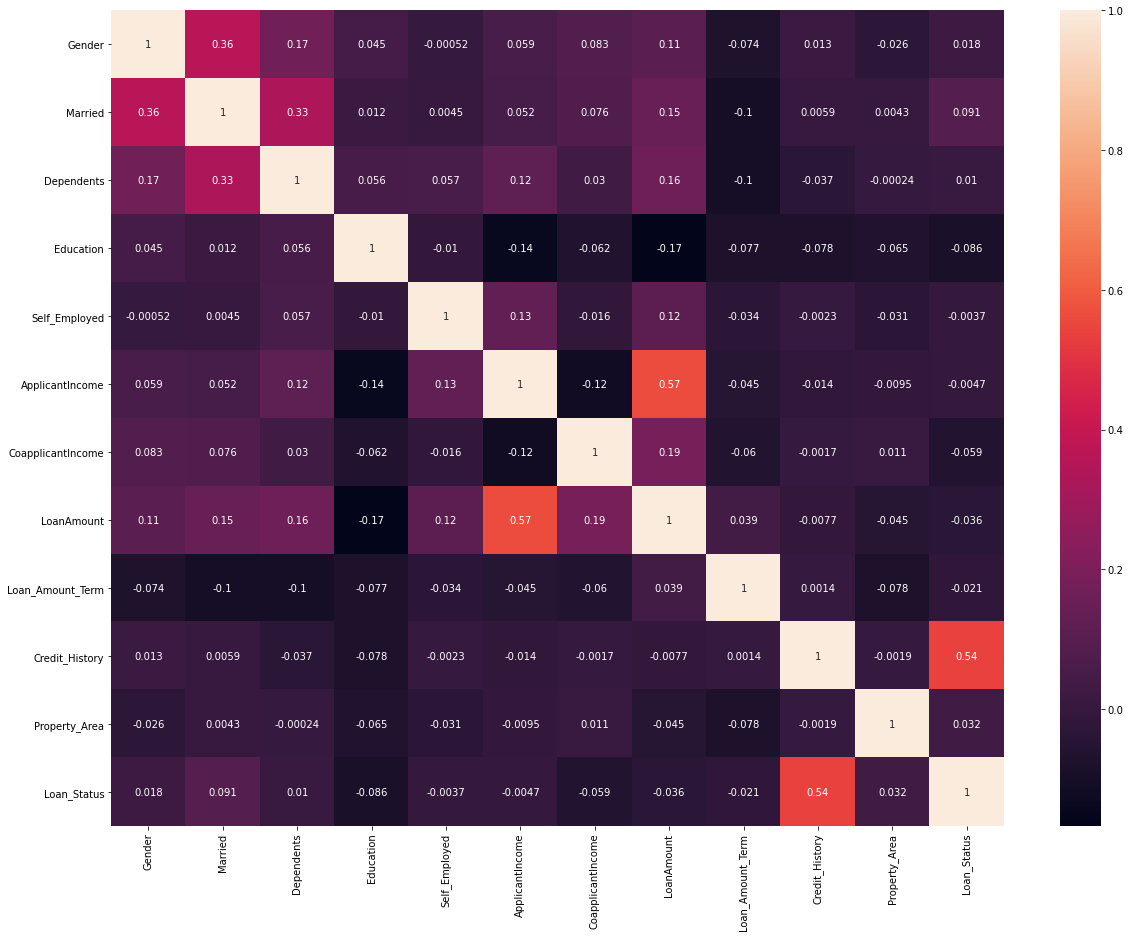

In [31]:
#heatmap for correlation

plt.figure(figsize=[20,15])
sns.heatmap(loan.corr(),annot=True)
plt.show()

Observations:

The most positively correlated variable with the target variable is the Credit History.

The most negatively correlated variable with the target variable is Education.

We can see that Self Employed and Applicant's Income does not show much correlation with the Target Variable

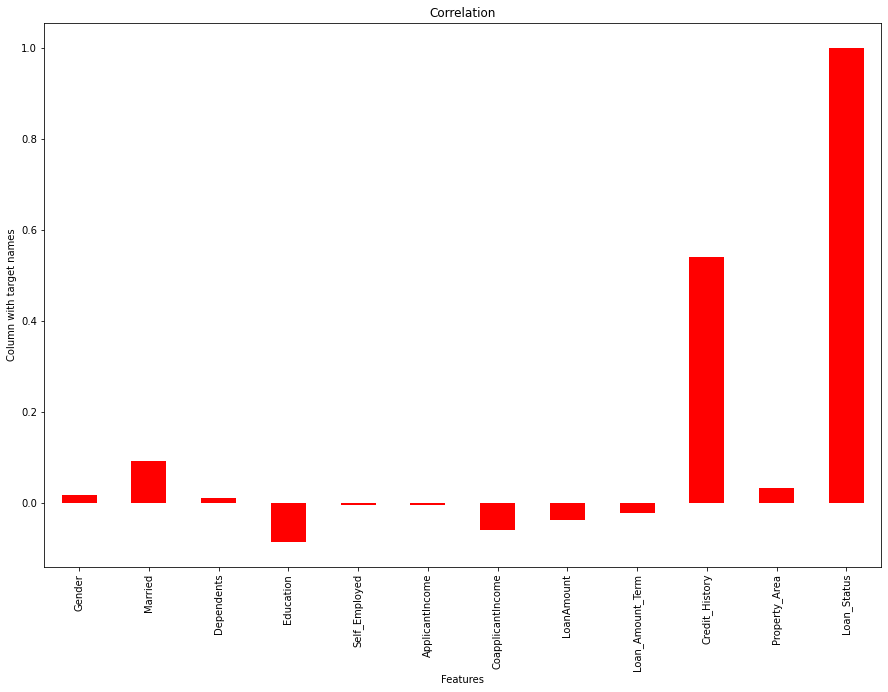

In [32]:
#barplot for correlation

plt.figure(figsize=(15,10))
loan.corr()['Loan_Status'].plot(kind='bar',color='r')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

The positively correlated columns with the Target Variable are Credit History, Married, Property Area, Gender & Dependents

# Checking outlier using boxplot

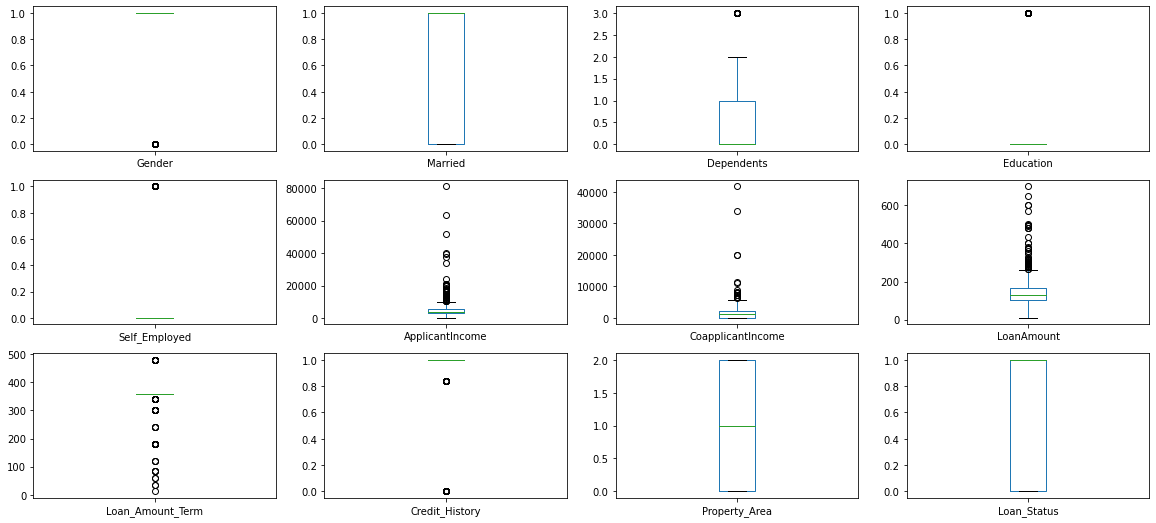

In [33]:
#plotting boxplot to check the outlier in dataset


loan.plot(kind='box',subplots=True,layout=(8,4),figsize=(20,25))
plt.show()

There are few outliers in our continuous type of variables. 
we will resolve these outliers.

# Removing Outliers

In [34]:
# Zscore technique

from scipy.stats import zscore

z=np.abs(zscore(loan))

In [35]:
loan_new=loan[(z<3).all(axis=1)]
print(loan.shape)
print(loan_new.shape)

(614, 12)
(577, 12)


In [36]:
loss=((614-577)/614)*100
loss

6.026058631921824

There are too many outliers present in the majority of our columns. So we need remove Outliers and create model.

# checking skewness

In [37]:
loan.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

There is skewness , lets remove skewness after splitting data

# Spliting independent (X) and target varaibles (Y)

In [38]:
#specify input and output attribute

X=loan_new.drop(columns=['Loan_Status'],axis=1)
Y=loan_new['Loan_Status']

In [39]:
#using power transform to skew the data

from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

skewness removed

In [40]:
#importing library for scaling 

from sklearn.preprocessing import StandardScaler

#scaling data

sdan=StandardScaler()

X=sdan.fit_transform(X)

X

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634, -1.34019905],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.14260892,
         0.51523634,  1.1948064 ],
       [-2.09583477, -1.36251079, -0.80924269, ...,  0.14260892,
        -2.22500746,  0.01546372]])

In [41]:
#checking shape of X and Y

print(X.shape)
print(Y.shape)

(577, 11)
(577,)


# Checking Best Random state

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


maxac=0
maxrs=0

for i in range(1,200):
    X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.30,random_state=i)
    log=LogisticRegression()
    log.fit(X_train,Y_train)
    pre=log.predict(X_test)
    acc=accuracy_score(Y_test,pre)
    if acc>maxac:
        maxac=acc
        maxrs=i

print("Best Accuracy is ",maxac, "at Random_state",maxrs)

Best Accuracy is  0.867816091954023 at Random_state 12


We have found best random_state value as 12. We will create our train_test_split using random_state(12)

# Creating Model

In [43]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.30,random_state=12)

In [44]:
models=[LogisticRegression(),
       SVC(),
       DecisionTreeClassifier(),
       RandomForestClassifier(),
       AdaBoostClassifier(),
       ]



In [45]:
l_diff=[]

In [46]:
from sklearn.model_selection import cross_val_score

for mod in models:
    print('\n')
    print(mod)
    mod.fit(X_train,Y_train)
    prd=mod.predict(X_test)
    acrcy=accuracy_score(Y_test,prd)
    f1=f1_score(Y_test,prd)
    print(confusion_matrix(Y_test,prd))
    print(classification_report(Y_test,prd))
    print('The accuracy of {} is {}'.format(mod,acrcy))
    cv=cross_val_score(mod,X,Y,cv=5)
    print("cross_val_score :",cv.mean())
    diff=np.abs(accuracy_score(Y_test,prd)-cv.mean())
    ac='differnce b/w accuracy and cross score : {:.2f}'.format(diff)
    print(ac)
    l_diff.append((mod,ac))
    for i in ([0,1]):
        f1=f1_score(Y_test,prd,pos_label=i)
        print('f1 score for {} is {}'.format(i,f1))

    



LogisticRegression()
[[ 25  17]
 [  6 126]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.68        42
           1       0.88      0.95      0.92       132

    accuracy                           0.87       174
   macro avg       0.84      0.77      0.80       174
weighted avg       0.86      0.87      0.86       174

The accuracy of LogisticRegression() is 0.867816091954023
cross_val_score : 0.7920689655172414
differnce b/w accuracy and cross score : 0.08
f1 score for 0 is 0.684931506849315
f1 score for 1 is 0.9163636363636363


SVC()
[[ 25  17]
 [  2 130]]
              precision    recall  f1-score   support

           0       0.93      0.60      0.72        42
           1       0.88      0.98      0.93       132

    accuracy                           0.89       174
   macro avg       0.91      0.79      0.83       174
weighted avg       0.89      0.89      0.88       174

The accuracy of SVC() is 0.8908045977011494
cross_val_s

we observe that SVC has best Accuracy compared to other models. Lets check cross validation score for best fit model

In [47]:
#lets check diff between cross val score and accuracy score

l_diff

[(LogisticRegression(), 'differnce b/w accuracy and cross score : 0.08'),
 (SVC(), 'differnce b/w accuracy and cross score : 0.08'),
 (DecisionTreeClassifier(), 'differnce b/w accuracy and cross score : 0.04'),
 (RandomForestClassifier(), 'differnce b/w accuracy and cross score : 0.04'),
 (AdaBoostClassifier(), 'differnce b/w accuracy and cross score : 0.03')]

The difference between the accuracy score and cv score of Ada Boost Classifier is 0.03 and Decison Tree is 0.04.

therefore, Ada Boost Classifier is giving us better accuracy than other models. 

lets proceed with hyper Tunning for these two models to select out best model.

# Hyper Tunning the model

**ADA Boost and Decision Tree**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

**ADA Boost**

In [49]:
#creating parameters list to pass in GridSearchCV

Ada_parameters={'n_estimators':range(5,20),'algorithm':('SAMME','SAMME.R'),'random_state':range(20,40)}

In [50]:
Ada=GridSearchCV(AdaBoostClassifier(),Ada_parameters,cv=3)

In [51]:
Ada.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'n_estimators': range(5, 20),
                         'random_state': range(20, 40)})

In [52]:
Ada.best_params_


{'algorithm': 'SAMME', 'n_estimators': 15, 'random_state': 20}

In [53]:
Ada_mod=AdaBoostClassifier(algorithm='SAMME',n_estimators=15,random_state=20)
Ada_mod.fit(X_train,Y_train)
pred=Ada_mod.predict(X_test)

print(accuracy_score(Y_test,pred)*100)

print(confusion_matrix(Y_test,prd))

print(classification_report(Y_test,prd))


87.93103448275862
[[ 24  18]
 [ 13 119]]
              precision    recall  f1-score   support

           0       0.65      0.57      0.61        42
           1       0.87      0.90      0.88       132

    accuracy                           0.82       174
   macro avg       0.76      0.74      0.75       174
weighted avg       0.82      0.82      0.82       174



**Decison Tree**

In [54]:
Dtree_parameters={'max_depth':np.arange(2,15),
               'criterion':['gini','entropy'],
               'splitter':['best','random']}

DT=GridSearchCV(DecisionTreeClassifier(),Dtree_parameters,cv=3)

DT.fit(X_train,Y_train)

DT.best_params_

{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}

In [55]:
Dtree_model=DecisionTreeClassifier(criterion= 'gini', max_depth= 2,splitter='best')
Dtree_model.fit(X_train,Y_train)

pred=Dtree_model.predict(X_test)
print(accuracy_score(Y_test,pred)*100)
print(confusion_matrix(Y_test, pred))
print(classification_report(Y_test, pred))

88.50574712643679
[[ 23  19]
 [  1 131]]
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        42
           1       0.87      0.99      0.93       132

    accuracy                           0.89       174
   macro avg       0.92      0.77      0.81       174
weighted avg       0.89      0.89      0.87       174



After hyper Tuning the Ada Boost Classifier accuracy had improved to 87.9% and for Decison Tree it improved to 88.5%

# AUC/ROC Curve for Adabosst and Decision Tree classifier

**AdaBoost**

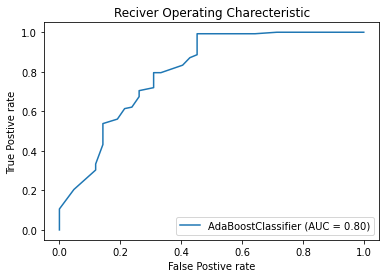

In [56]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(Ada_mod,X_test,Y_test)
plt.title("Reciver Operating Charecteristic")
plt.xlabel('False Postive rate')
plt.ylabel('True Postive rate')
plt.show()

**Decision Tree**

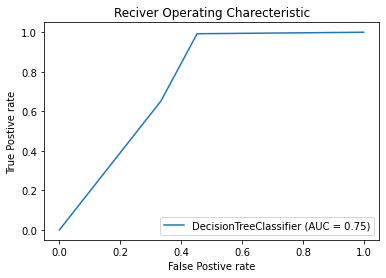

In [57]:
plot_roc_curve(Dtree_model,X_test,Y_test)
plt.title("Reciver Operating Charecteristic")
plt.xlabel('False Postive rate')
plt.ylabel('True Postive rate')
plt.show()

After observing Hyper Tuning and AUC_ROC curve of Decision Tree Classifier and AdaBoostClassifier our best mode is Ada Boost

In [58]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

finalada=AdaBoostClassifier()
finalada.fit(X_train,Y_train)
print(finalada)
prd=finalada.predict(X_test)
ac=accuracy_score(Y_test,prd)
rcal=recall_score(Y_test,prd,average='binary')
prec=precision_score(Y_test,prd,average='binary')
f1=f1_score(Y_test,prd)

result=pd.DataFrame([['AdaBoostClassifier',ac,rcal,prec,f1]],
                   columns=['Model','Accuracy','Recall','Precision','F1 score'])

result

AdaBoostClassifier()


,Model,Accuracy,Recall,Precision,F1 score
0,AdaBoostClassifier,0.821839,0.901515,0.868613,0.884758


# Saving Model

In [59]:
import joblib

joblib.dump(finalada,'Loan.pkl')


['Loan.pkl']

# Conclusion

In [60]:
abc=np.array(Y_test)
abc

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [61]:
predict=np.array(Ada_mod.predict(X_test))

In [62]:
loan_pred=pd.DataFrame({'Original':abc,'predicted':predict},index=range(len(abc)))

In [63]:
loan_pred

,Original,predicted
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
169,1,1
170,1,1
171,0,1
172,1,1
